In [158]:
%matplotlib inline

from modsim import *
import numpy as np

In [159]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
N = UNITS.newton

In [216]:
condition = Condition(height = 381 * m,
                      v_init = 0 * m / s,
                      g = 9.8 * m/s**2,
                      mass = 75 * kg,
                      rho = 1.2 * kg/m**3,
                      v_term = 17 * m / s,
                      duration = 40 * s)

In [217]:
def final_state(results):
    """Returns the final position and velocity, with units.
    
    results: TimeFrame with y and v.
    
    returns: y, v at t_end
    """
    t_end = results.index[-1]
    y, v = results.loc[t_end]
    return y*m, v*m/s

In [218]:
def make_system(condition, area):
    """Makes a System object for the given conditions.
    
    condition: Condition with height, g, mass, diameter, 
               rho, v_term, and duration
    
    returns: System with init, g, mass, rho, C_d, area, and ts
    """
    unpack(condition)
    
    init = State(y=height, v=v_init)
    C_d = 2 * mass * g / (rho * (area*m**2) * v_term**2)
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, rho=rho,
                  C_d=C_d, area=area*m**2,
                  y_attach=height, ts=ts)

In [219]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    y, v = state
    unpack(system)
    
    f_drag = rho * v**2 * C_d * area / 2
    a_drag = f_drag / mass
    
    dydt = v
    dvdt = -g + a_drag
    return dydt, dvdt

In [220]:
def clusterfuck(areas):
    vkin = TimeSeries()
    for area in areas:
        condition.set(duration = 4000)
        system= make_system(condition, area*m**2)
        slope_func(system.init, 0, system)
        run_odeint(system, slope_func)
        
        T = interp_inverse(system.results.y,kind='cubic')
        ground=T(0)
        condition.set(duration=ground)
        
        system = make_system(condition, area*m**2)
        run_odeint(system, slope_func)
        y_final, v_final = final_state(system.results)
        vkin[area] = v_final
    return vkin

1      -17.000000006752543 meter / second
2      -17.000000006752543 meter / second
3       -17.00000000675254 meter / second
4      -17.000000006752543 meter / second
5      -17.000000006752536 meter / second
6       -17.00000000675254 meter / second
7       -17.00000000675254 meter / second
8      -17.000000006752543 meter / second
9      -17.000000006752536 meter / second
10     -17.000000006752536 meter / second
11      -17.00000000675254 meter / second
12      -17.00000000675254 meter / second
13     -17.000000006752547 meter / second
14      -17.00000000675254 meter / second
15      -17.00000000675254 meter / second
16     -17.000000006752543 meter / second
17      -17.00000000675255 meter / second
18     -17.000000006752536 meter / second
19     -17.000000006752543 meter / second
20     -17.000000006752536 meter / second
21      -17.00000000675254 meter / second
22      -17.00000000675254 meter / second
23     -17.000000006752533 meter / second
24      -17.00000000675254 meter /

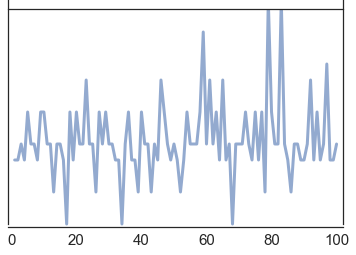

In [221]:
areas = linspace(1,100, 100, dtype = int)
po =clusterfuck(areas)
print (po)
plot(areas,po)

In [222]:
area = 2

vkin = TimeSeries()
condition.set(duration = 4000)
system= make_system(condition, area*m**2)
slope_func(system.init, 0, system)
run_odeint(system, slope_func)
y_final,v_final = final_state(system.results)
print(system.results)
        
T = interp_inverse(system.results.y,kind='cubic')
ground=T(0)
condition.set(duration=ground)
        
system = make_system(condition, area*m**2)
run_odeint(system, slope_func)
y_final, v_final = final_state(system.results)
print(system.results)

                  y     v
0.0       381.00000   0.0
40.0     -278.55923 -17.0
80.0     -958.55923 -17.0
120.0   -1638.55923 -17.0
160.0   -2318.55923 -17.0
200.0   -2998.55923 -17.0
240.0   -3678.55923 -17.0
280.0   -4358.55923 -17.0
320.0   -5038.55923 -17.0
360.0   -5718.55923 -17.0
400.0   -6398.55923 -17.0
440.0   -7078.55923 -17.0
480.0   -7758.55923 -17.0
520.0   -8438.55923 -17.0
560.0   -9118.55923 -17.0
600.0   -9798.55923 -17.0
640.0  -10478.55923 -17.0
680.0  -11158.55923 -17.0
720.0  -11838.55923 -17.0
760.0  -12518.55923 -17.0
800.0  -13198.55923 -17.0
840.0  -13878.55923 -17.0
880.0  -14558.55923 -17.0
920.0  -15238.55923 -17.0
960.0  -15918.55923 -17.0
1000.0 -16598.55923 -17.0
1040.0 -17278.55923 -17.0
1080.0 -17958.55923 -17.0
1120.0 -18638.55923 -17.0
1160.0 -19318.55923 -17.0
...             ...   ...
2840.0 -47878.55923 -17.0
2880.0 -48558.55923 -17.0
2920.0 -49238.55923 -17.0
2960.0 -49918.55923 -17.0
3000.0 -50598.55923 -17.0
3040.0 -51278.55923 -17.0
3080.0 -5195

In [87]:
slope_func(system.init, 0, system)

(<Quantity(0.0, 'meter / second')>, <Quantity(-9.8, 'meter / second ** 2')>)

In [88]:
run_odeint(system, slope_func)

In [89]:
system.results

,y,v
0.0,381.000000,0.000000
0.4,380.216561,-3.914432
0.8,377.872889,-7.795684
1.2,373.988725,-11.611688
1.6,368.596240,-15.332534
2.0,361.738985,-18.931348
2.4,353.470537,-22.384988
2.8,343.852899,-25.674499
3.2,332.954781,-28.785332
3.6,320.849829,-31.707340
